<a href="https://colab.research.google.com/github/DiSolo28/ML/blob/main/ML%203%20%D0%BB%D0%B0%D0%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Загрузка библиотек и предобратка данных

In [2]:
!pip install pandas scikit-learn seaborn scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel

In [4]:
# Загрузка набора данных
df = pd.read_csv('/content/diamond.csv')

In [20]:
# Определение соответствий для замены Cut
cut_mapping = {'Ideal': 80, 'Good': 30, 'Very Good': 50, 'Fair': 10, 'Signature-Ideal': 100}

# Замена Cut
df['Cut'] = df['Cut'].replace(cut_mapping)

# Определение соответствий для замены Color
color_mapping = {'D': 1, 'E': 2, 'F': 3, 'G': 4, 'H': 5, 'I': 6}

# Замена Color
df['Color'] = df['Color'].replace(color_mapping)

# Определение соответствий для замены Clarity
clarity_mapping = {'FL': 10, 'IF': 20, 'VVS1': 30, 'VVS2': 40, 'VS1': 50, 'VS2':60, 'SI1':70}

# Замена Clarity
df['Clarity'] = df['Clarity'].replace(clarity_mapping)

# Определение соответствий для замены Polish
polish_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Polish
df['Polish'] = df['Polish'].replace(polish_mapping)

# Определение соответствий для замены Symmetry
symmetry_mapping = {'EX': 1, 'ID': 2, 'VG': 3, 'G': 4}

# Замена Symmetry
df['Symmetry'] = df['Symmetry'].replace(symmetry_mapping)

# Определение соответствий для замены Report
report_mapping = {'GIA': 1, 'AGSL': 2}

# Замена Report
df['Report'] = df['Report'].replace(report_mapping)

<ipython-input-20-017cbf8bc2ac>:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Report'] = df['Report'].replace(report_mapping)


In [21]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,6,5,2,3,1,1,5169
1,0.83,6,5,4,2,2,2,3470
2,0.85,6,5,2,1,1,1,3183
3,0.91,6,2,2,3,3,1,4370
4,0.83,6,4,2,1,1,1,3171
...,...,...,...,...,...,...,...,...
5995,1.03,6,1,2,1,1,1,6250
5996,1.00,4,1,2,3,3,1,5328
5997,1.02,6,1,2,1,1,1,6157
5998,1.27,6,4,4,1,1,1,11206


In [22]:
df['is_expensive_diamond'] = np.where(df['Price'] >= 50000, 1, 0)
df.is_expensive_diamond = df.is_expensive_diamond.astype('category')
df['Price'] = df['Price'].astype('category')

In [23]:
Y = df['is_expensive_diamond'] # выбираем целевую переменную (категориальную)
X = df.drop('is_expensive_diamond', axis=1) # переменные для проверки влияния

X = X.drop('Price', axis=1)

In [24]:
df.drop('Price', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Carat Weight          6000 non-null   float64 
 1   Cut                   6000 non-null   int64   
 2   Color                 6000 non-null   int64   
 3   Clarity               6000 non-null   int64   
 4   Polish                6000 non-null   int64   
 5   Symmetry              6000 non-null   int64   
 6   Report                6000 non-null   int64   
 7   is_expensive_diamond  6000 non-null   category
dtypes: category(1), float64(1), int64(6)
memory usage: 334.2 KB


In [25]:
df

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,is_expensive_diamond
0,1.10,6,5,2,3,1,1,5169,0
1,0.83,6,5,4,2,2,2,3470,0
2,0.85,6,5,2,1,1,1,3183,0
3,0.91,6,2,2,3,3,1,4370,0
4,0.83,6,4,2,1,1,1,3171,0
...,...,...,...,...,...,...,...,...,...
5995,1.03,6,1,2,1,1,1,6250,0
5996,1.00,4,1,2,3,3,1,5328,0
5997,1.02,6,1,2,1,1,1,6157,0
5998,1.27,6,4,4,1,1,1,11206,0


# 2. Масштабирование признаков

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Carat Weight  6000 non-null   float64
 1   Cut           6000 non-null   int64  
 2   Color         6000 non-null   int64  
 3   Clarity       6000 non-null   int64  
 4   Polish        6000 non-null   int64  
 5   Symmetry      6000 non-null   int64  
 6   Report        6000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 328.2 KB


In [27]:
# Создаем копию данных
X_processed = X.copy()

category_columns: list[str] = X_processed.select_dtypes(include=['category']).columns # собираем колонки помеченные как category

# Применяем One-Hot Encoding
X_processed = pd.get_dummies(X_processed, columns=category_columns,drop_first=True)

In [28]:
X_processed

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.10,6,5,2,3,1,1
1,0.83,6,5,4,2,2,2
2,0.85,6,5,2,1,1,1
3,0.91,6,2,2,3,3,1
4,0.83,6,4,2,1,1,1
...,...,...,...,...,...,...,...
5995,1.03,6,1,2,1,1,1
5996,1.00,4,1,2,3,3,1
5997,1.02,6,1,2,1,1,1
5998,1.27,6,4,4,1,1,1


In [29]:
# Выбираем числовые признаки
numeric_features = X_processed.select_dtypes(include=['float64']).columns.tolist()

# Инициализируем scaler
scaler = MinMaxScaler()

# Применяем нормализацию
X_processed[numeric_features] = scaler.fit_transform(X_processed[numeric_features])


In [30]:
X_processed

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,0.162037,6,5,2,3,1,1
1,0.037037,6,5,4,2,2,2
2,0.046296,6,5,2,1,1,1
3,0.074074,6,2,2,3,3,1
4,0.037037,6,4,2,1,1,1
...,...,...,...,...,...,...,...
5995,0.129630,6,1,2,1,1,1
5996,0.115741,4,1,2,3,3,1
5997,0.125000,6,1,2,1,1,1
5998,0.240741,6,4,4,1,1,1


# 3. Очистка данных и удаление выбросов

In [31]:
from sklearn.model_selection import cross_val_score

def train_and_evaluate(X, Y):
    # Разделение данных на обучающую и тестовую выборки
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.2, random_state=42, stratify=Y)

    # Инициализация модели
    model = LogisticRegression(max_iter=1000)

    # Обучение модели
    model.fit(X_train, Y_train)

    # Предсказания на обучающей выборке
    Y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(Y_train, Y_train_pred)

    # Предсказания на тестовой выборке
    Y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(Y_test, Y_test_pred)

    # Вывод результатов
    print(f"Точность на обучающей выборке: {train_accuracy:.4f}")
    print(f"Точность на тестовой выборке: {test_accuracy:.4f}")

    # Классификационный отчет
    print("\nКлассификационный отчет на тестовой выборке:")
    print(classification_report(Y_test, Y_test_pred))

    return model

In [32]:
train_and_evaluate(X_processed, Y)

Точность на обучающей выборке: 0.9944
Точность на тестовой выборке: 0.9925

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1188
           1       0.67      0.50      0.57        12

    accuracy                           0.99      1200
   macro avg       0.83      0.75      0.78      1200
weighted avg       0.99      0.99      0.99      1200



LogisticRegression(max_iter=1000)

**Метод 1: удаление на основе медианы**

In [33]:
# Функция для удаления выбросов на основе межквартильного размаха (1.5 IQR)
def remove_outliers_based_on_iqr(X, y, iqr_multiplier=1.5):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем первый и третий квартили для каждой числовой переменной
    Q1 = X_numeric.quantile(0.25)
    Q3 = X_numeric.quantile(0.75)

    # Вычисляем межквартильный размах (IQR)
    IQR = Q3 - Q1

    # Оставляем только те значения, которые находятся в диапазоне [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    X_filtered = X_numeric[~((X_numeric < (Q1 - iqr_multiplier * IQR)) | (X_numeric > (Q3 + iqr_multiplier * IQR))).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered


In [34]:
X_iqr, y_iqr = remove_outliers_based_on_iqr(X_processed, Y, iqr_multiplier=3)

In [35]:
X_processed.describe()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.270611,4.750667,3.743833,3.369333,2.187667,2.365000,1.122333
std,0.220230,1.209990,1.561714,1.370367,1.072989,1.106185,0.327698
min,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,0.115741,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000
50%,0.175926,4.000000,4.000000,3.000000,2.000000,3.000000,1.000000
75%,0.388889,6.000000,5.000000,4.000000,3.000000,3.000000,1.000000
max,1.000000,6.000000,6.000000,8.000000,4.000000,4.000000,2.000000


In [36]:
X_iqr.describe()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
count,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.000000,5266.0
mean,0.271553,4.646601,3.682112,3.325294,2.218382,2.410558,1.0
std,0.222094,1.199503,1.565042,1.365966,1.126632,1.156539,0.0
min,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.0
25%,0.115741,4.000000,2.000000,2.000000,1.000000,1.000000,1.0
50%,0.171296,4.000000,4.000000,3.000000,3.000000,3.000000,1.0
75%,0.398148,6.000000,5.000000,4.000000,3.000000,3.000000,1.0
max,1.000000,6.000000,6.000000,8.000000,4.000000,4.000000,1.0


In [37]:
train_and_evaluate(X_iqr, y_iqr)

Точность на обучающей выборке: 0.9943
Точность на тестовой выборке: 0.9972

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1044
           1       1.00      0.70      0.82        10

    accuracy                           1.00      1054
   macro avg       1.00      0.85      0.91      1054
weighted avg       1.00      1.00      1.00      1054



LogisticRegression(max_iter=1000)

**Модель 1** работает чуть лучше это видно по точности на тестовой выборке и по классификации. Параметры лучше и выше.

 **Метод 2: удаление на основе среднего**

In [38]:
# Функция для удаления выбросов на основе среднего значения

def remove_outliers_based_on_mean(X, y, mean_multiplier=2):
    # Убедимся, что работаем только с числовыми данными
    X_numeric = X.select_dtypes(include=['number'])

    # Рассчитываем среднее значение и стандартное отклонение для каждой переменной
    mean_values = X_numeric.mean()
    std_values = X_numeric.std()

    # Устанавливаем верхний и нижний пороги на основе среднего значения и множителя стандартного отклонения
    lower_threshold = mean_values - mean_multiplier * std_values
    upper_threshold = mean_values + mean_multiplier * std_values

    # Фильтруем наблюдения, которые находятся в пределах этих порогов по всем признакам
    X_filtered = X_numeric[~((X_numeric < lower_threshold) | (X_numeric > upper_threshold)).any(axis=1)]

    # Синхронизируем y с отфильтрованными X
    y_filtered = y.loc[X_filtered.index]

    return X_filtered, y_filtered

In [39]:
X_mean, y_mean = remove_outliers_based_on_mean(X_processed.copy(), Y.copy())

In [40]:
X_processed.describe()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.270611,4.750667,3.743833,3.369333,2.187667,2.365000,1.122333
std,0.220230,1.209990,1.561714,1.370367,1.072989,1.106185,0.327698
min,0.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000
25%,0.115741,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000
50%,0.175926,4.000000,4.000000,3.000000,2.000000,3.000000,1.000000
75%,0.388889,6.000000,5.000000,4.000000,3.000000,3.000000,1.000000
max,1.000000,6.000000,6.000000,8.000000,4.000000,4.000000,2.000000


In [41]:
X_mean.describe()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
count,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.000000,4784.0
mean,0.253925,4.691472,3.700042,3.180811,2.209866,2.394858,1.0
std,0.202552,1.146823,1.561919,1.175095,1.129064,1.154500,0.0
min,0.000000,3.000000,1.000000,2.000000,1.000000,1.000000,1.0
25%,0.115741,4.000000,3.000000,2.000000,1.000000,1.000000,1.0
50%,0.166667,4.000000,4.000000,3.000000,3.000000,3.000000,1.0
75%,0.370370,6.000000,5.000000,4.000000,3.000000,3.000000,1.0
max,0.708333,6.000000,6.000000,6.000000,4.000000,4.000000,1.0


In [42]:
train_and_evaluate(X_mean, y_mean)

Точность на обучающей выборке: 0.9984
Точность на тестовой выборке: 0.9979

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       955
           1       0.00      0.00      0.00         2

    accuracy                           1.00       957
   macro avg       0.50      0.50      0.50       957
weighted avg       1.00      1.00      1.00       957



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LogisticRegression(max_iter=1000)

**Метод 2** лучше по точности обучающей выборки и по точности тестовой выборки, однако по классификации хуже чем предыдущий метод.

**3: Методы отбора признаков**

Отбор признаков (feature selection) — важный шаг в машинном обучении, который помогает улучшить качество моделей и ускорить их работу. Цель отбора — убрать лишние или малозначимые признаки, которые не влияют на предсказания модели, либо могут ухудшить её производительность.

Зачем это нужно:

**Улучшение производительности модели** — избыточные признаки могут создавать шум и снижать точность.

**Повышение интерпретируемости** — меньший набор признаков легче анализировать и объяснять.

**Снижение вычислительной сложности** — меньшее количество признаков ускоряет обучение и предсказание.


В sklearn основные методы отбора признаков включают:

**Filter методы** — основаны на статистических тестах, например, SelectKBest использует критерий, чтобы выбрать признаки с наибольшим вкладом.

**Wrapper методы** — оценивают модели на разных подмножествах признаков, например, рекурсивное исключение признаков (RFE).

**Embedded методы** — выполняют отбор признаков во время обучения модели, например, с помощью L1-регуляризации (Lasso).

## **Filter методы**

In [43]:
from sklearn.feature_selection import SelectKBest, f_regression

In [44]:
# Применяем SelectKBest для выбора 5 лучших признаков
selector = SelectKBest(score_func=f_regression, k=5)
X_kbest = selector.fit_transform(X_processed, Y)

In [45]:
selector.scores_

array([258.67444639,   7.71747163, 135.26538294, 248.93180441,
         1.47760485,   1.77540497,   0.58810104])

In [46]:
X_processed.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report'],
      dtype='object')

In [47]:
X_processed

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,0.162037,6,5,2,3,1,1
1,0.037037,6,5,4,2,2,2
2,0.046296,6,5,2,1,1,1
3,0.074074,6,2,2,3,3,1
4,0.037037,6,4,2,1,1,1
...,...,...,...,...,...,...,...
5995,0.129630,6,1,2,1,1,1
5996,0.115741,4,1,2,3,3,1
5997,0.125000,6,1,2,1,1,1
5998,0.240741,6,4,4,1,1,1


In [48]:
selector.get_support(indices=True)

array([0, 1, 2, 3, 5])

In [49]:
# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support(indices=True)]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Symmetry'], dtype='object')


In [50]:
# Преобразуем X_kbest в DataFrame
X_kbest_df = pd.DataFrame(X_kbest, columns=selected_features)

# Обучаем и оцениваем модель
train_and_evaluate(X_kbest_df, Y)

Точность на обучающей выборке: 0.9942
Точность на тестовой выборке: 0.9925

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1188
           1       0.67      0.50      0.57        12

    accuracy                           0.99      1200
   macro avg       0.83      0.75      0.78      1200
weighted avg       0.99      0.99      0.99      1200



LogisticRegression(max_iter=1000)

## **Wrapper методы**

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Инициализируем модель логистической регрессии
base_model = LogisticRegression(max_iter=1000)

# Инициализируем RFE для выбора 5 лучших признаков
rfe = RFE(estimator=base_model, n_features_to_select=5)
rfe.fit(X_processed, Y)

# Получаем список отобранных признаков
selected_features = X_processed.columns[rfe.support_]
print("Отобранные признаки:", selected_features)

Отобранные признаки: Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Report'], dtype='object')


In [52]:
# Отбираем признаки
X_rfe = X_processed[selected_features]

# Обучаем и оцениваем модель
model = train_and_evaluate(X_rfe, Y)

Точность на обучающей выборке: 0.9942
Точность на тестовой выборке: 0.9933

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1188
           1       0.75      0.50      0.60        12

    accuracy                           0.99      1200
   macro avg       0.87      0.75      0.80      1200
weighted avg       0.99      0.99      0.99      1200



## **Embedded методы**

Коэффициенты модели без регуляризации: [[ 6.60284646  0.06037115 -1.36635775  1.151827    0.02091468 -0.03249196
   0.73184254]]
Коэффициенты модели с регуляризацией: [[14.45313421 -0.33073787 -1.92997578  1.34827746 -0.15443868 -0.11571494
   0.85090262]]
Отобранные признаки: Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Коэффициенты модели после отбора признаков: [[14.4573577  -0.33088995 -1.93037554  1.34859701 -0.15459714 -0.1157279
   0.85161457]]


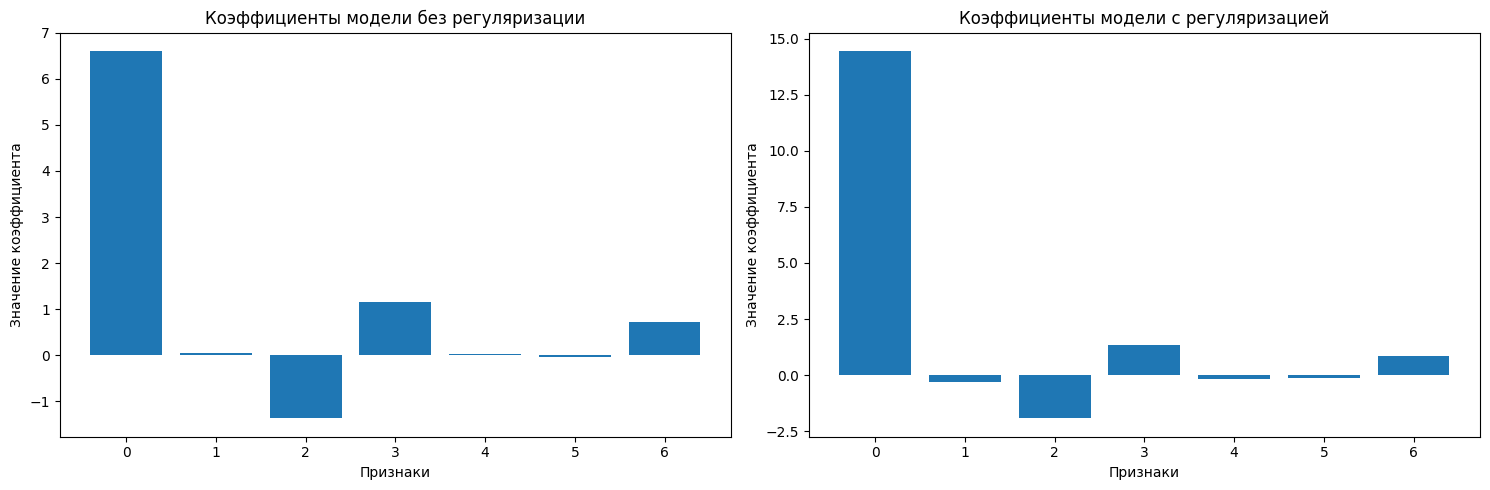

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import numpy as np
import matplotlib.pyplot as plt

# Обучаем модель без регуляризации
model_no_penalty = LogisticRegression(solver='lbfgs', max_iter=1000)
model_no_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели без регуляризации
coefficients_no_penalty = model_no_penalty.coef_
print("Коэффициенты модели без регуляризации:", coefficients_no_penalty)

# Инициализируем модель с L1-регуляризацией
model_with_penalty = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Обучаем модель с регуляризацией
model_with_penalty.fit(X_processed, Y)

# Выводим коэффициенты модели с регуляризацией
coefficients_with_penalty = model_with_penalty.coef_
print("Коэффициенты модели с регуляризацией:", coefficients_with_penalty)

# Используем SelectFromModel для отбора признаков
selector = SelectFromModel(model_with_penalty, prefit=True)
X_embedded = selector.transform(X_processed)

# Получаем список отобранных признаков
selected_features = X_processed.columns[selector.get_support()]
print("Отобранные признаки:", selected_features)

# Обучаем модель на отобранных признаках
model_embedded = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model_embedded.fit(X_embedded, Y)

# Выводим коэффициенты модели после отбора признаков
coefficients_embedded = model_embedded.coef_
print("Коэффициенты модели после отбора признаков:", coefficients_embedded)

# Визуализация коэффициентов моделей
plt.figure(figsize=(15, 5))

# Коэффициенты модели без регуляризации
plt.subplot(1, 2, 1)
plt.bar(range(len(coefficients_no_penalty[0])), coefficients_no_penalty[0])
plt.title("Коэффициенты модели без регуляризации")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

# Коэффициенты модели с регуляризацией
plt.subplot(1, 2, 2)
plt.bar(range(len(coefficients_with_penalty[0])), coefficients_with_penalty[0])
plt.title("Коэффициенты модели с регуляризацией")
plt.xlabel("Признаки")
plt.ylabel("Значение коэффициента")

plt.tight_layout()
plt.show()

In [54]:
# Преобразуем X_embedded в DataFrame
X_embedded_df = pd.DataFrame(X_embedded, columns=selected_features)

# Обучаем и оцениваем модель
model = train_and_evaluate(X_embedded_df, Y)

Точность на обучающей выборке: 0.9944
Точность на тестовой выборке: 0.9925

Классификационный отчет на тестовой выборке:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1188
           1       0.67      0.50      0.57        12

    accuracy                           0.99      1200
   macro avg       0.83      0.75      0.78      1200
weighted avg       0.99      0.99      0.99      1200



**Filter метод**: Точность на обучающей выборке - 0.9942, точность на тестовой выборке - 0.9925

**Wrapper метод**: Точность на обучающей выборке - 0.9942, точность на тестовой выборке - 0.9933

**Embedded метод**: Точность на обучающей выборке - 0.9944, точность на тестовой выборке - 0.9925

По обучающим данным лучше подходит embedded метод, а по тестовым данным лучше подходит wrapper метод. Я предполагаю, что лучший метод это все же *wrapper метод*.

**Описание работы**:

Метод **SequentialFeatureSelector** работает следующим образом:  

1. **Режим Forward (вперёд):**
   - Начинает с пустого набора признаков.
   - Последовательно добавляет признаки, которые наибольшим образом улучшают качество модели (по метрике оценки).
   - Повторяет процесс, пока не достигнет заданного количества признаков.  

2. **Режим Backward (назад):**
   - Начинает с полного набора признаков.
   - Последовательно удаляет признаки, исключение которых минимально влияет на качество модели.
   - Повторяет процесс, пока не останется заданное количество признаков.  

Оценка качества выполняется с использованием модели, переданной в метод, и заданной метрики.

**Сравнение с предыдущими методами**

- **Filter:** Быстрые методы, основаны на статистике (корреляция, χ²), не зависят от модели. SequentialFeatureSelector (SFS) учитывает взаимодействие признаков с моделью, чего filter-методы не делают.  
- **Wrapper:** Методы, оценивающие качество модели на подмножествах признаков (пример — SFS). SFS эффективнее полного перебора, но медленнее embedded-методов.  
- **Embedded:** Встроенный отбор во время обучения модели (например, Lasso, feature importance). Быстрее SFS, но зависит от алгоритма.  

**Итог:** SFS — это wrapper-метод, который точнее filter, но медленнее embedded. Подходит для небольших наборов данных, где важен учет взаимодействия признаков.

**Объяснение результата**

1. Улучшение производительности:


Если результаты с использованием SFS показывают улучшение по сравнению с предыдущими методами, это может быть связано с более точным выбором признаков, которые действительно имеют значение для модели, в отличие от менее значимых признаков, которые могли быть выбраны другими методами.
2. Потеря производительности:

Если SFS не показывает улучшения, это может быть связано с избыточностью признаков или тем, что выбранные признаки не улучшают обобщающую способность модели.
3. Кросс-валидация:

Использование кросс-валидации в процессе отбора признаков может помочь избежать переобучения и предоставить более надежные оценки производительности.

# **Логистическая регрессия**

Логистическая регрессия — это модель для задач бинарной классификации, которая предсказывает вероятность того, что наблюдение принадлежит к одному из двух классов (например, 0 или 1). Модель основана на линейной регрессии, но использует сигмоидную функцию активации для приведения предсказаний в диапазон от 0 до 1. Логистическая регрессия идеально подходит для задач, где нужно классифицировать данные на два класса.

## **Функция активации (Сигмоида)**

In [65]:
import numpy as np

# Сигмоидная функция
def sigmoid(z):
    # Убедимся, что z это numpy массив
    return 1 / (1 + np.exp(-z))

# Простая реализация логистической регрессии
class OwnLogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Метод для обучения модели
    def fit(self, X, y):
        # Инициализация весов
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        # Градиентный спуск
        for idx_,_ in enumerate(range(self.iterations)):
            # Линейная комбинация
            linear_model = np.dot(X, self.weights) + self.bias
            # Применяем сигмоиду для предсказания
            y_pred = sigmoid(linear_model)

            # Вычисляем градиенты
            dw = (1 / len(X)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(X)) * np.sum(y_pred - y)

            # Обновляем веса и смещение
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    # Метод для предсказания
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        print("regression",linear_model)
        y_pred = sigmoid(linear_model)
        print("sigmoid",y_pred)
        # Возвращаем метки классов (0 или 1)
        return [1 if i > 0.5 else 0 for i in y_pred]

In [66]:
# Пример использования
X = np.array([[0.1, 1.2], [1.1, 2.2], [2.1, 1.9], [1.0, 1.0]])
y = np.array([0, 1, 1, 0])

model = OwnLogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X, y)
predictions = model.predict(X)

regression [-2.48902698  1.89302513  3.0459193  -1.27754449]
sigmoid [0.07663102 0.86910007 0.95460602 0.2179685 ]


# **5: Кросс-валидация**

Виды кросс-валидации

**K-fold Cross-Validation:**
Данные делятся на K равных частей (folds). Модель обучается на K-1 частях и тестируется на оставшейся части. Процесс повторяется K раз, и результат — среднее качество по всем K итерациям. Этот метод позволяет эффективно использовать все данные как для обучения, так и для тестирования.

**ShuffleSplit:**
Этот метод несколько раз случайно перемешивает данные и делит их на тренировочные и тестовые выборки. В отличие от K-fold, здесь нет необходимости в разделении на фиксированное количество частей. Хорошо работает на небольших выборках данных и для оценки стабильности модели.

**Train-Test-Validation Split:**
Данные делятся на три части: тренировочные данные для обучения модели, тестовые данные для первичной оценки и валидационные данные для окончательной оценки. Полезен для задач, где требуется как тестирование, так и финальная проверка на отложенных данных.

In [67]:
# Импорт необходимых библиотек
import numpy as np
from sklearn.model_selection import KFold, ShuffleSplit, train_test_split, cross_val_score

In [68]:
# K-Fold Cross-Validation
def k_fold_cross_validation(X, y, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    accuracies = []

    # Реализация K-Fold вручную
    for train_index, test_index in kf.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому фолду
    print(f"K-Fold Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому фолду: {accuracies}")

# Пример использования:
k_fold_cross_validation(X = X_processed.to_numpy(), y = Y.to_numpy())


K-Fold Cross-Validation - Средняя точность: 0.994
Точности по каждому фолду: [0.9941666666666666, 0.9925, 0.9958333333333333, 0.9908333333333333, 0.9966666666666667]


Модель достаточно стабильна, потому что разброс точности по фолдам минимальный. Средняя точность 0,994. Разница между мин и макс фолдами - 0.006.

In [69]:
# ShuffleSplit Cross-Validation
def shuffle_split_cross_validation(X, y, n_splits=5, test_size=0.4):
    ss = ShuffleSplit(n_splits=n_splits, test_size=test_size)
    accuracies = []

    # Реализация ShuffleSplit вручную
    for train_index, test_index in ss.split(X):
        model = LogisticRegression(max_iter=1000)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Обучение модели на тренировочной выборке
        model.fit(X_train, y_train)

        # Предсказания на тестовой выборке
        y_pred = model.predict(X_test)

        # Оценка точности
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Выводим среднюю точность и точности по каждому разделению
    print(f"ShuffleSplit Cross-Validation - Средняя точность: {np.mean(accuracies)}")
    print(f"Точности по каждому разделению: {accuracies}")

# Пример использования:
shuffle_split_cross_validation(X_processed.to_numpy(), Y.to_numpy())

ShuffleSplit Cross-Validation - Средняя точность: 0.9946666666666667
Точности по каждому разделению: [0.99375, 0.9941666666666666, 0.9945833333333334, 0.9958333333333333, 0.995]


Средняя точность здесь 0.9947, что чуть больше чем предыдущий метод. Разница между мин и макс также лучше чем в предыдущем - 0.002.

In [70]:
# Train-Test-Validation Split
def train_test_validation_split(X, y):
    model = LogisticRegression(max_iter=1000)
    # Разделяем данные на тренировочные и оставшиеся (валидация + тест)
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

    # Разделяем оставшиеся данные на валидационные и тестовые
    X_train_train, X_test, y_train_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Обучаем модель на тренировочных данных
    model.fit(X_train_train, y_train_train)

    # Оцениваем на валидационных данных
    y_valid_pred = model.predict(X_validation)
    validation_accuracy = accuracy_score(y_validation, y_valid_pred)
    print(f"Точность на валидационных данных: {validation_accuracy}")

    # Оцениваем на тестовых данных
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Точность на тестовых данных: {test_accuracy}")

# Пример использования:
train_test_validation_split(X_processed.to_numpy(), Y.to_numpy())

Точность на валидационных данных: 0.9925
Точность на тестовых данных: 0.9885416666666667


**Какой метод подходит:**

Моему датасету больше подходит метод ShuffleSplit Cross-Validation, так как там средняя точность больше и разница между мин и макс меньше.